# Создание и анализ графового набора данных для проверки контрагентов с помощью веб-скрэйпинга или анализа открытой базы данных

## Создание и визализация графового набора данных

Разделы: <a class="anchor" id="0"></a>

1. [Создание списка ребер для создания графового набора данных](#1)
2. [Создание графа с помощью библиотеки NetworkX](#2)
3. [Визуализация с помощью NetworkX](#3)
4. [Визуализация с помощью Plotly](#4)
5. [Визуализация с помощью Bokeh](#5)
6. [Анализ графового набора данных](#6)

<a id="1"></a>
### Создание списка ребер для создания графового набора данных

In [1]:
import pandas as pd
import numpy as np
import re

import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from bokeh.models import HoverTool, ColumnDataSource, CustomJS
from bokeh.plotting import figure, show, from_networkx, output_notebook

Считываем обработанные данные, для дальнейшего создания графа

In [2]:
df = pd.read_csv('companies_10000_ready.csv')
df = df.drop(columns=df.columns[0])
df = df.replace({'[]': np.nan})
df.head()

name_of_company           ogrn                   active  \
0   ООО "ГАЗПРОМ ПЕРЕРАБОТКА"  1071102001651     Действующая компания   
1         АО "АТОМЭНЕРГОПРОМ"  1077758081664     Действующая компания   
2              ПО "КЛУБ "МКМ"  1077760061862  Действующая организация   
3                    АО "ОСК"  1079847085966     Действующая компания   
4  ООО ПИК "ГАРАНТИЯ ПРИБЫЛИ"  1095406025307     Действующая компания   

          inn        kpp        okpo               reg  \
0  1102054991  780201001  97152834.0        1 мая 2007   
1  7706664260  770601001  81527864.0      19 июля 2007   
2  7709757347  501001001  82566180.0  13 сентября 2007   
3  7838395215  783801001  82264639.0    14 ноября 2007   
4  5406541017  540701001  62882625.0   20 августа 2009   

                                              adress  \
0  194044, г. Санкт-Петербург, ул. Смолячкова, д....   
1      119017, г. Москва, ул. Большая Ордынка, д. 24   
2  141981, Московская область, г. Дубна, ул. Верн...   
3      191119, г. Санкт-Петербург, ул. Марата, д. 90   
4  630132, Новосибирская область, г. Новосибирск,...   

                                                 act  \
0                        Производство нефтепродуктов   
1  Деятельность, связанная с использованием вычис...   
2  Деятельность по предоставлению прочих финансов...   
3  Строительство кораблей, судов и плавучих конст...   
4  Деятельность по обеспечению эффективности функ...   

                                            act_code  ...  \
0  ['192000', '201100', '205950', '351000', '3511...  ...   
1  ['620900', '072100', '244600', '253000', '3510...  ...   
2  ['649000', '011100', '011300', '011620', '0116...  ...   
3  ['301100', '254000', '259926', '265180', '2811...  ...   
4                               ['661140', '661100']  ...   

                                cn_org  \
0  ['/id/1237700505481-npt-transport']   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   

                                              cn_kid  \
0  ['/id/1142722003467-gazprom-pererabotka-blagov...   
1  ['/id/1027739121475-tvehl', '/id/1207700170545...   
2                                                NaN   
3  ['/id/1089848054339-admiralteyskie-verfi', '/i...   
4  ['/id/1095475003821-pik-hartiya-bezopasnosti',...   

                                             cn_pred  \
0  ['/id/1021100731190-gazprom-transgaz-uhta', '/...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                       cn_fut  \
0  ['/id/1215000008013', '/id/1212300003992']   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

                                             z_names  \
0  ['ООО "ГАЗПРОМ ДОБЫЧА АСТРАХАНЬ"', 'ООО "ГАЗПР...   
1  ['АО "КОНЦЕРН РОСЭНЕРГОАТОМ"', 'АО "АТОМЭНЕРГО...   
2                                                NaN   
3  ['ФГУП "РОСМОРПОРТ"', 'РОСМОРРЕЧФЛОТ', 'ФКУ "Д...   
4                                                NaN   

                                             z_ogrns  \
0  [1023001538460, 1025601028221, 1077847507759, ...   
1  [5087746119951, 1067746426439, 1027700043645, ...   
2                                                NaN   
3  [1037702023831, 1047796291950, 1027739684598, ...   
4                                                NaN   

                                             p_names  \
0  ['ЗАО "ГНХП М"', 'ПАО "ГАЗПРОМ"', 'ООО "НХРС"'...   
1  ['АО "КОНЦЕРН РОСЭНЕРГОАТОМ"', 'АО "ТВЭЛ"', 'П...   
2                                                NaN   
3  ['БАНК ВТБ (ПАО)', 'ПАО СБЕРБАНК', 'ООО "ЛЕГИО...   
4        

In [3]:
len(df)

10000

In [4]:
df_test  = df[['ogrn', 'compet_ogrn']]
df_test

ogrn                                        compet_ogrn
0     1071102001651      [1057747421247, 1232300003759, 1160280116138]
1     1077758081664      [1157746446747, 1097746362130, 1087746887634]
2     1077760061862                                                NaN
3     1079847085966      [1152503000539, 1134101006170, 1022700514605]
4     1095406025307      [1047796046198, 1085475004339, 1035401911600]
...             ...                                                ...
9995  1177746272010  [1077757625670, 1023601589230, 1035009550355, ...
9996  5077746432726  [1177746037820, 1135902009253, 5147746029305, ...
9997  1027739661498  [1037739429320, 1085000003582, 1021600002500, ...
9998  1070265000420  [1055002006190, 1137746058856, 1137746058141, ...
9999  1127747081880  [1025005330404, 1067760941566, 1035403195761, ...

[10000 rows x 2 columns]

In [5]:
coded_connections = {'cn_ceo':'Связь по руководителю', 
                     'cn_uch':'Связь по учредителю', 
                     'cn_org':'Связь по управляемым организациям', 
                     'cn_kid':'Связь по дочерним организациям', 
                     'cn_pred':'Связь по правопредшественникам', 
                     'cn_fut':'Связь по правопреемникам'
                     }

> Создание списка ребер, в котором хранятся связи по руководителю, учредителю, управляемым организациям, дочерним организациям, правопредшественникам и правопреемниками

In [6]:
connections_cols = list(coded_connections.keys())
edgelist_cn = []
for i in range(len(df)):
    company = df.iloc[i]
    for col in connections_cols:
        if pd.notnull(company[col]):
            for i in eval(company[col]):
                ogrn_i = int(re.findall(r'[0-9]+',i)[0])
                if company['ogrn'] != ogrn_i:
                    edgelist_cn.append((company['ogrn'], ogrn_i, {'connection':coded_connections[col]}))

> Создание списка ребер, в котором хранятся только связи с конкурентами 

In [7]:
edgelist = []
for i in range(len(df_test)):
    company = df_test.iloc[i]
    if pd.notnull(company['compet_ogrn']):
        for i in eval(company['compet_ogrn']):
            edgelist.append((company['ogrn'], i,  {'connection':'Является конкурентом'}))

In [8]:
len(edgelist), len(edgelist_cn)

(54117, 50992)

> Создание общего списка ребер, в котором хранятся все связи

In [9]:
full_edgelist = edgelist+edgelist_cn
len(full_edgelist)

105109

<a id="2"></a>
## Создание графа с помощью библиотеки NetworkX

> Граф, в котором учитываются связи только между конкурентами

In [10]:
G = nx.Graph(edgelist)
len_g_nodes = len(G.nodes())
len_g_edges = len(G.edges())
print('Узлов:', len_g_nodes)
print('Ребер:', len_g_edges)

Узлов: 13376
Ребер: 31939


In [11]:
largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc)
len_gl_nodes = len(G_largest.nodes())
len_gl_edges = len(G_largest.edges())
print(f"Количество узлов: {len_gl_nodes}")
print(f"Количество ребер: {len_gl_edges}")

Количество узлов: 1675
Количество ребер: 5229


Рассчитаем отношение количества узлов и ребер основного графа к его самому большому подграфу по количеству узлов

In [12]:
print('Отношение кол-ва узлов и ребер в графе с подгафом')
print(f'Узлов: {len_g_nodes/len_gl_nodes}')
print(f'Ребер: {len_g_edges/len_gl_edges}')

Отношение кол-ва узлов и ребер в графе с подгафом
Узлов: 7.985671641791045
Ребер: 6.108051252629566


> Граф, в котором учитываются все связи

In [13]:
G_full = nx.Graph(full_edgelist)
len_gf_nodes = len(G_full.nodes())
len_gf_edges = len(G_full.edges())
print('Узлов:', len_gf_nodes)
print('Ребер:', len_gf_edges)

Узлов: 39857
Ребер: 70681


In [14]:
largest_cc = max(nx.connected_components(G_full), key=len)
G_full_largest = G_full.subgraph(largest_cc)
len_gfl_nodes = len(G_full_largest.nodes())
len_gfl_edges = len(G_full_largest.edges())
print(f"Количество узлов: {len_gfl_nodes}")
print(f"Количество ребер: {len_gfl_edges}")

Количество узлов: 37616
Количество ребер: 68412


Рассчитаем отношение количества узлов и ребер основного графа к его самому большому подграфу по количеству узлов

In [15]:
print('Отношение кол-ва узлов и ребер в графе с подгафом')
print(f'Узлов: {len_gf_nodes/len_gfl_nodes}')
print(f'Ребер: {len_gf_edges/len_gfl_edges}')

Отношение кол-ва узлов и ребер в графе с подгафом
Узлов: 1.0595757124627818
Ребер: 1.033166695901304


Также посчитаем отношение количества узлов и ребер первого графа ко второму

In [16]:
print('Отношение кол-ва узлов и ребер в первом и втором графах')
print(f'Узлов: {len_gf_nodes/len_g_nodes}')
print(f'Ребер: {len_gf_edges/len_g_edges}')

Отношение кол-ва узлов и ребер в первом и втором графах
Узлов: 2.979739832535885
Ребер: 2.2129997808322113


<a id="3"></a>
### Визуализация с помощью NetworkX

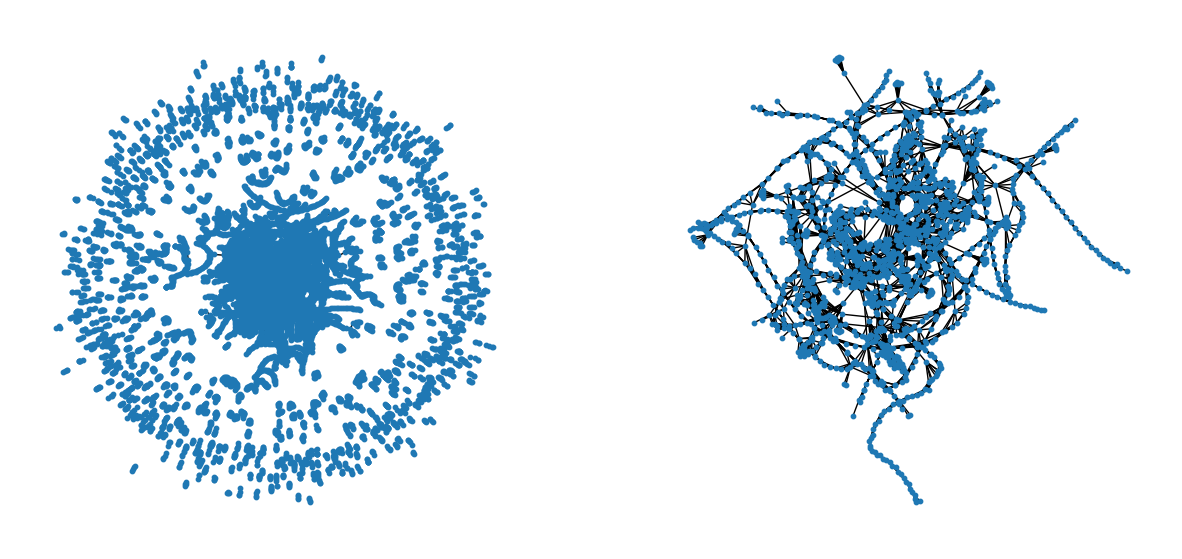

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
nx.draw(G, pos=nx.spring_layout(G), node_size=10, ax=ax1)
nx.draw(G_largest, pos=nx.spring_layout(G_largest), node_size=10, ax=ax2)

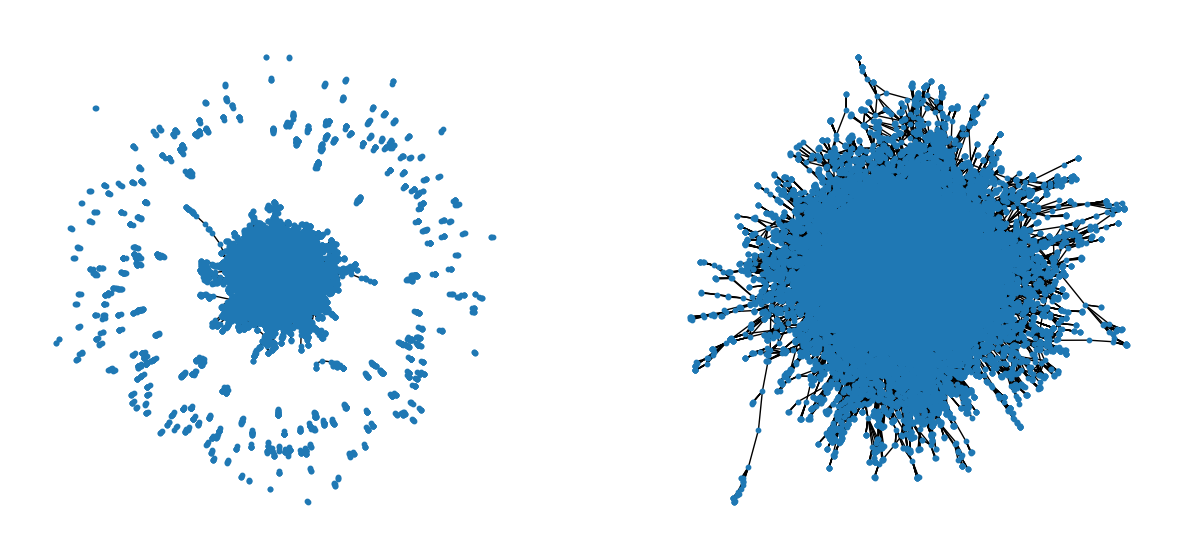

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
nx.draw(G_full, pos=nx.spring_layout(G_full), node_size=10, ax=ax1)
nx.draw(G_full_largest, pos=nx.spring_layout(G_full_largest), node_size=10, ax=ax2)

<a id="4"></a>
## Визуализация с помощью библиотеки Plotly

Функция plotly_dynamic_graph визуализирует полученные графы по следующим принципам:
- Размер узла: Чем больше у компании связей, тем больше размер узла (по степени).
- Цвет узла: Чем больше у компании связей, тем ярче цвет узла - ближе к желтому (по степени).

При наведении курсором на узел графа появляется ОГРН компании и количесво связей у данной организации.

In [ ]:
def plotly_dynamic_graph(graph):
    pos = nx.spring_layout(graph, seed=52)

    # Извлекаем позиции узлов
    node_x = []
    node_y = []
    node_size = []  
    for node in graph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        # Размер узла пропорционален его степени
        node_size.append(3 * (len(list(graph.neighbors(node))) ** 0.5))

    # Создаем узлы
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='Viridis',
            size=node_size, 
            color=[],  
            line=dict(width=1, color='black')))  

    # Создаем кастомный текст при наведении на узлы
    hover_text = [f'Узел: {node}<br>Количество связей: {len(list(graph.neighbors(node)))}' for node in graph.nodes()]
    node_trace.hovertext = hover_text

    # Определяем цвет узлов в зависимости от количества связей
    node_adjacencies = []
    for node, adjacencies in enumerate(graph.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
    node_trace.marker.color = node_adjacencies

    # Создаем ребра
    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    # Создаем линии ребер
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    width=1000,
                    height=800))
    fig.show()

Визуализация первого графа и его подграфа, в которых связь между компаниями означает что организации являются конкурентами.

In [ ]:
plotly_dynamic_graph(G)

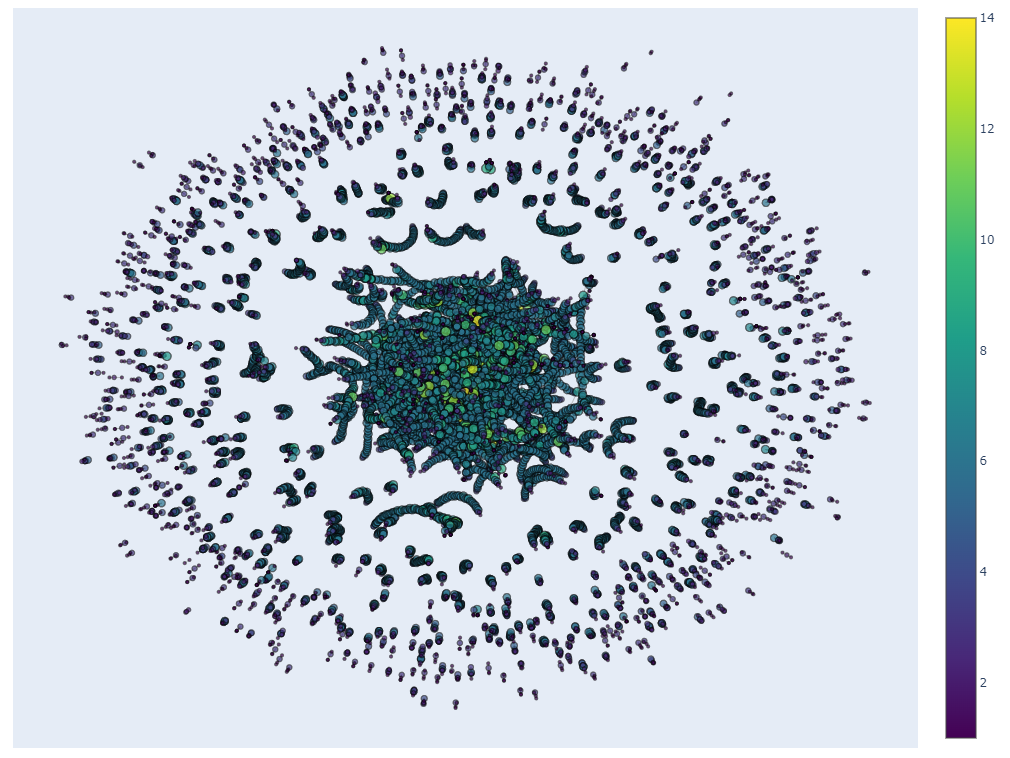

In [ ]:
plotly_dynamic_graph(G_largest)

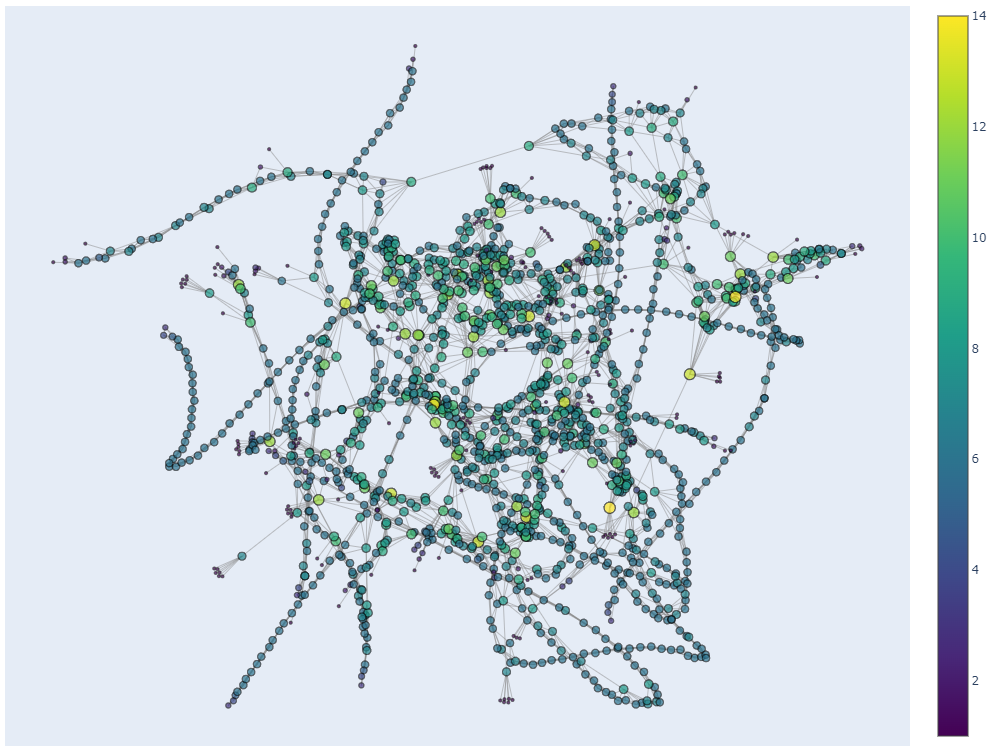

Визуализация второго графа и его подграфа, в которых между компаниями строятся все возможные связи.

In [ ]:
plotly_dynamic_graph(G_full)

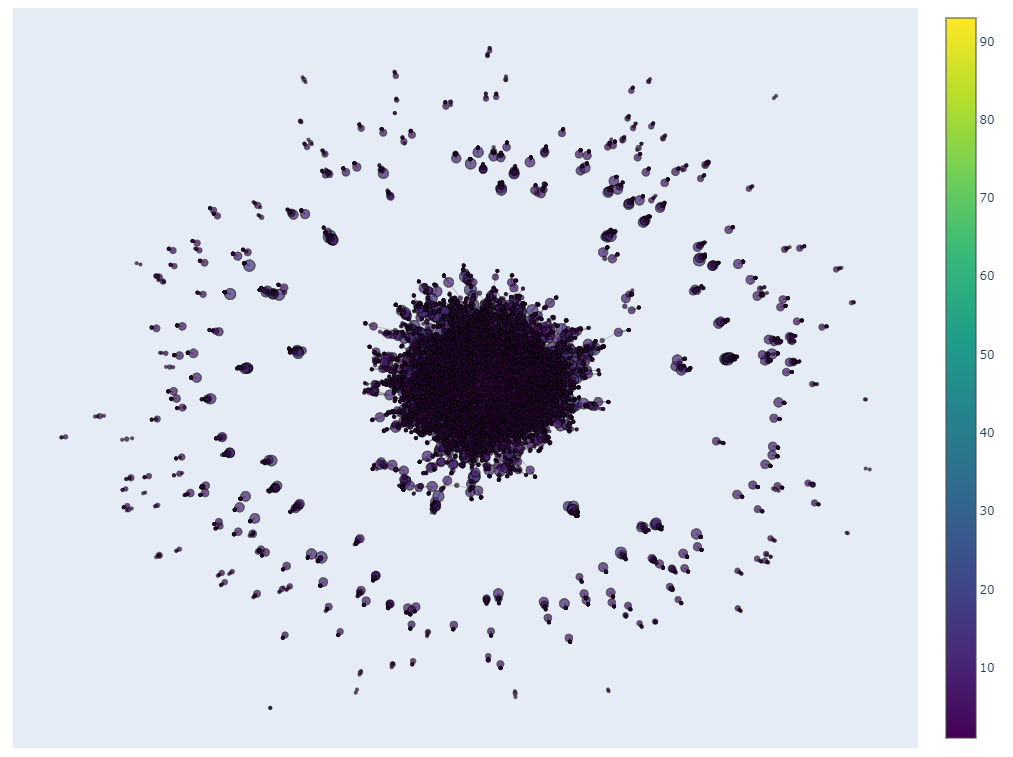

In [ ]:
plotly_dynamic_graph(G_full_largest)

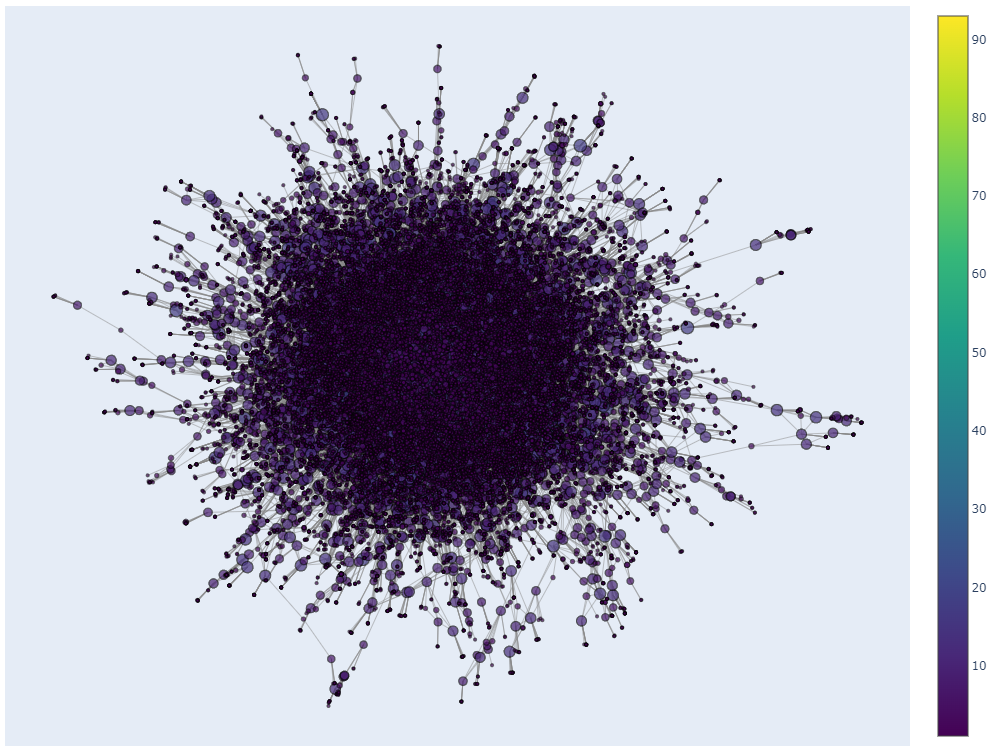

<a id="5"></a>
## Визуализация с помощью Bokeh

Функция bokeh_annotated_graph визуализирует граф с добавлением проекции различных атрибутов (данных о компании) при наведении курсором на узел. Если информация о компании находится в собранном наборе данных, то проекция включает в себя следующие атрибуты: название компании, состояние, ОГРН, ИНН, КПП, ОКПО, дата регистрации, адрес и ОГРН конкурентов. В случае, когда информация о компании отсутствует в наборе данных, проекция включает в себя только ОГРН данной компании.

In [ ]:
def bokeh_annotated_graph(df, edgelist, full=False):
    H = nx.Graph()
    for i in range(len(df)):
        company = df.iloc[i]
        H.add_node(
            company['ogrn'], # Используем ogrn как идентификатор узла
            name=company['name_of_company'],
            active=company['active'],
            inn=company['inn'],
            kpp=company['kpp'],
            okpo=company['okpo'],
            reg=company['reg'],
            address=company['adress'],
            compet_ogrn=company['compet_ogrn'],
        )
    H.add_edges_from(edgelist)
    if not full:
        largest_cc = max(nx.connected_components(H), key=len)
        H = H.subgraph(largest_cc)

    pos = nx.spring_layout(H)

    node_source = ColumnDataSource(data=dict(x=[], y=[], name=[], active=[], inn=[], kpp=[], okpo=[], reg=[], address=[], compet_ogrn=[], ogrn=[])) # Добавляем ogrn в ColumnDataSource
    for node, data in H.nodes(data=True):
        x, y = pos[node]
        node_source.data['x'].append(x)
        node_source.data['y'].append(y)
        node_source.data['name'].append(data.get('name', ''))
        node_source.data['active'].append(data.get('active', ''))
        node_source.data['inn'].append(data.get('inn', ''))
        node_source.data['kpp'].append(data.get('kpp', ''))
        node_source.data['okpo'].append(data.get('okpo', ''))
        node_source.data['reg'].append(data.get('reg', ''))
        node_source.data['address'].append(data.get('address', ''))
        node_source.data['compet_ogrn'].append(data.get('compet_ogrn', ''))
        node_source.data['ogrn'].append(node) 

    p = figure(title="Interactive Graph", x_range=(-1.1, 1.1), y_range=(-1.1, 1.1))

    p.scatter('x', 'y', size=20, source=node_source)

    # JavaScript код для динамического изменения всплывающих подсказок
    code = """
    var tooltips = [];
    if (cb_data.index.indices.length > 0) {
        var index = cb_data.index.indices[0];
        var name = source.data['name'][index];
        var active = source.data['active'][index];
        var inn = source.data['inn'][index];
        var kpp = source.data['kpp'][index];
        var okpo = source.data['okpo'][index];
        var reg = source.data['reg'][index];
        var address = source.data['address'][index];
        var compet_ogrn = source.data['compet_ogrn'][index];
        var ogrn = source.data['ogrn'][index]; 

        if (name != '') {
            tooltips.push(["Название", "@name"]);
        }
        if (active != '') {
            tooltips.push(["Действ.", "@active"]);
        }
        if (ogrn != '') { 
            tooltips.push(["ОГРН", "@ogrn"]);
        }
        if (inn != '') {
            tooltips.push(["ИНН", "@inn"]);
        }
        if (kpp != '') {
            tooltips.push(["КПП", "@kpp"]);
        }
        if (okpo != '') {
            tooltips.push(["ОКПО", "@okpo"]);
        }
        if (reg != '') {
            tooltips.push(["Дата регистрации", "@reg"]);
        }
        if (address != '') {
            tooltips.push(["Адрес", "@address"]);
        }
        if (compet_ogrn != '') {
            tooltips.push(["ОГРН конкурентов", "@compet_ogrn"]);
        }
    }
    hover.tooltips = tooltips;
    """

    hover = HoverTool()
    hover.callback = CustomJS(args=dict(source=node_source, hover=hover), code=code)
    p.add_tools(hover)

    graph_renderer = from_networkx(H, pos, scale=1, center=(0, 0))
    p.renderers.append(graph_renderer)
    output_notebook()
    show(p)

Визуализация первого графа и его подграфа, в которых связь между компаниями означает что организации являются конкурентами.

In [ ]:
bokeh_annotated_graph(df, edgelist, full=True)

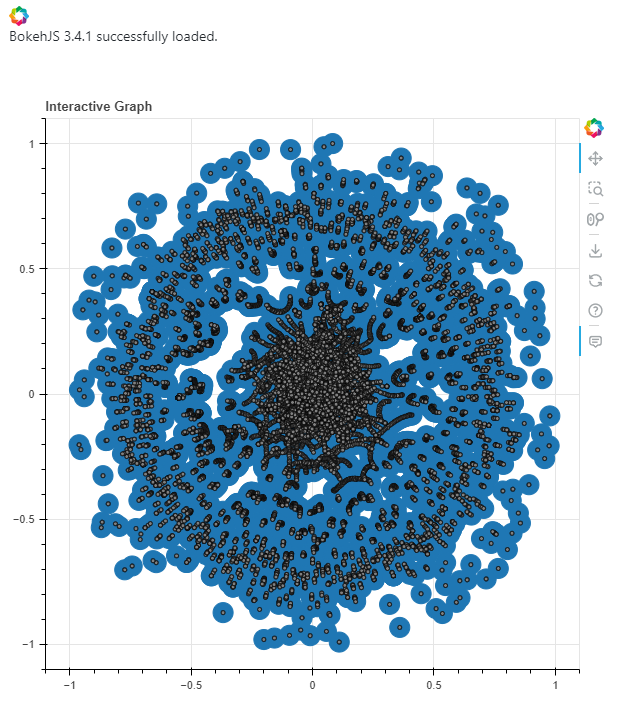
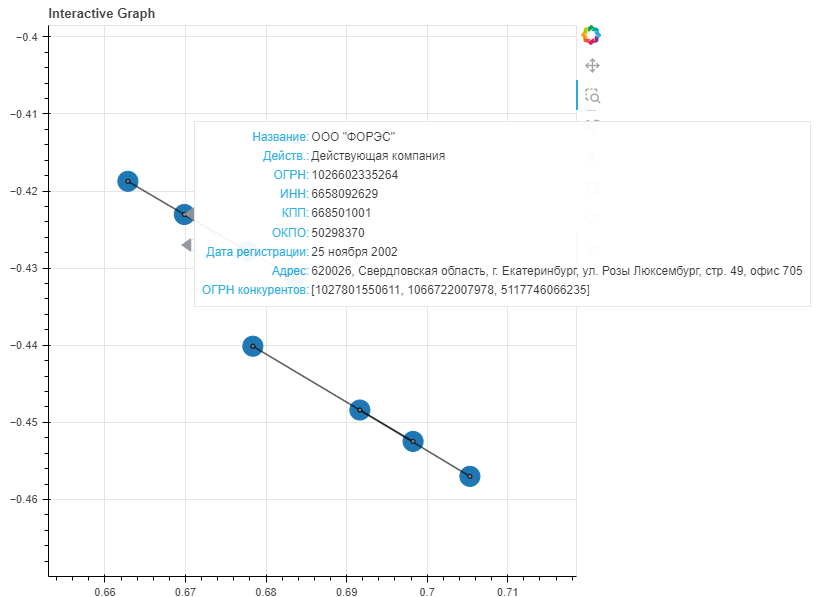
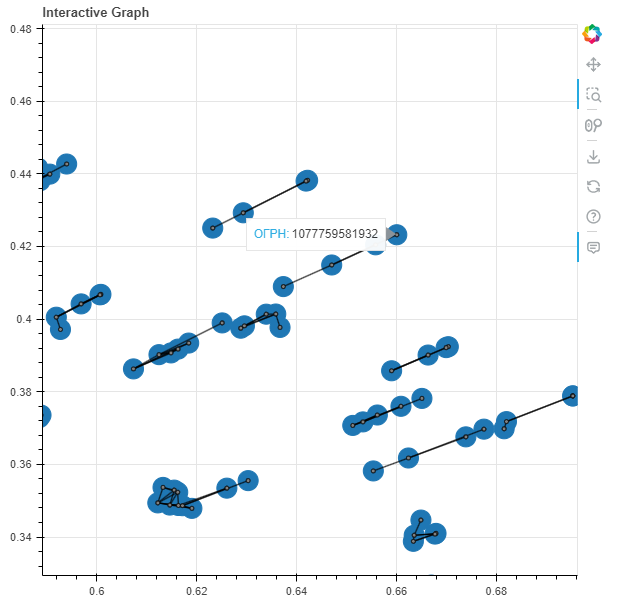

In [ ]:
bokeh_annotated_graph(df, edgelist)

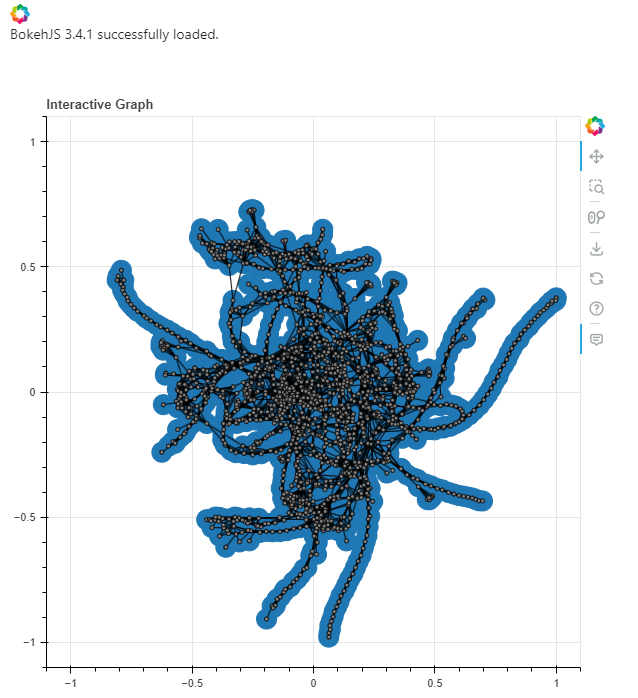

Визуализация второго графа и его подграфа, в которых между компаниями строятся все возможные связи.

In [ ]:
bokeh_annotated_graph(df, full_edgelist, full=True)

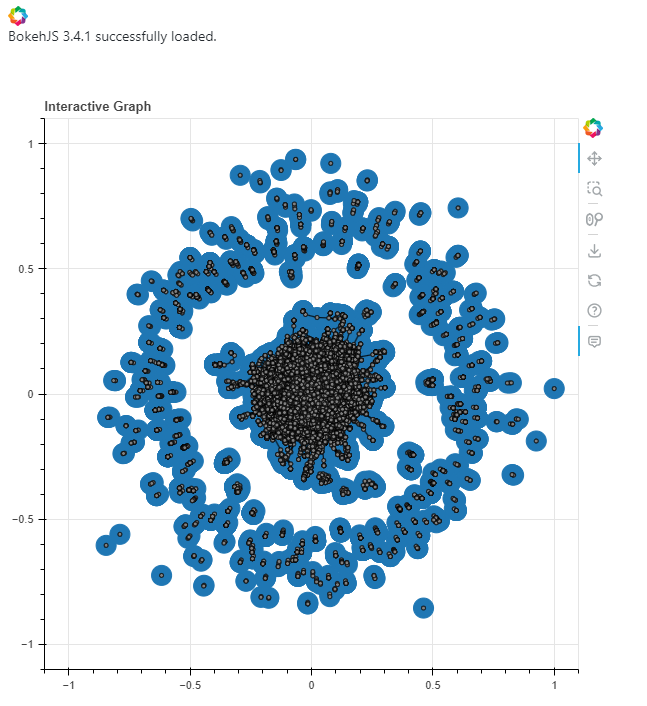
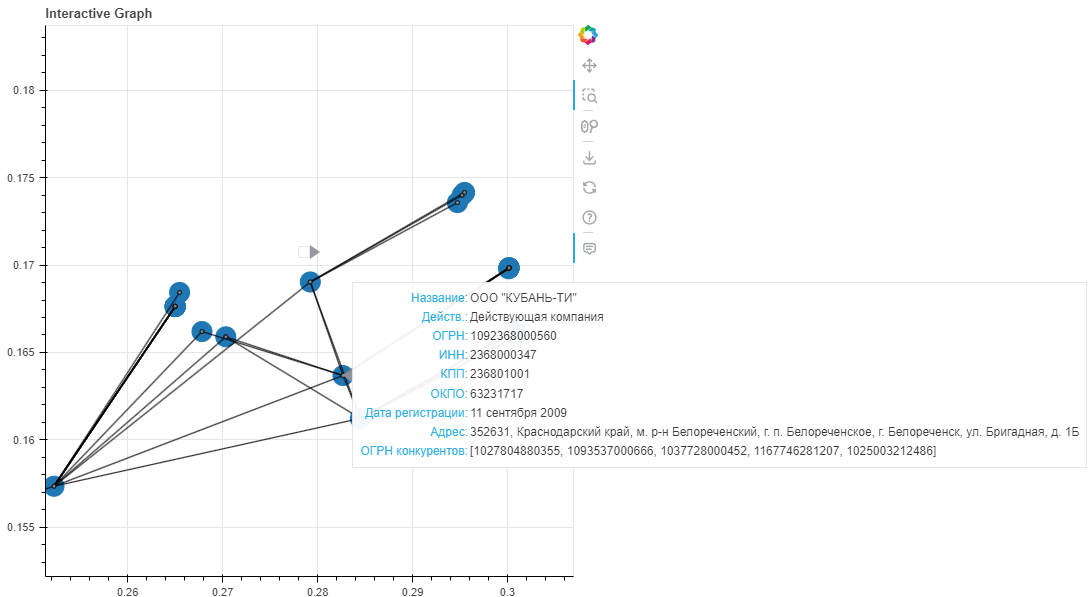
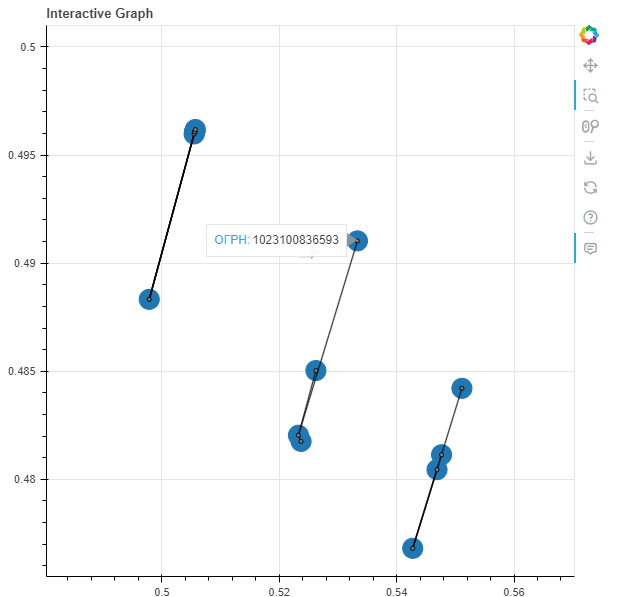

In [ ]:
bokeh_annotated_graph(df, full_edgelist)

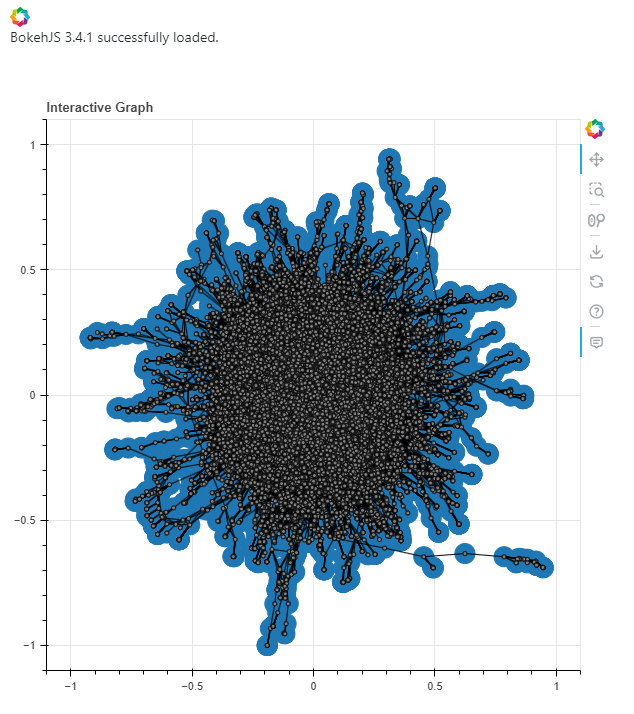

<a id="6"></a>
## Анализ графового набора данных


Для анализа построенных графов используется два функции: calculate_metrics_graph - для подсчета метрик основных графов и calculate_metrics_component - для полсчета метрик подграфов.

В данных функциях подсчитываются следубщие значения:
- Плотность графа: измеряет, насколько сильно узлы графа связаны между собой. Она рассчитывается как отношение числа рёбер в графе к максимально возможному числу рёбер, которое может быть между его вершинами. Если граф полностью связан, плотность будет равна 1, если же нет ни одной связи между вершинами, плотность будет равна 0.
- Степени узлов: количество рёбер, соединенных с данной вершиной (количество связей у компании). 
- Коэффициент кластеризации: вероятность того, что ближайшие соседи узла будут связаны не только с ним, но и между собой. Высокий коэффициент кластеризации указывает на то, что в группе существует тенденция к формированию более тесных связей между всеми её членами.


In [17]:
def calculate_metrics_graph(graph):
    print("Network Density:", nx.density(graph))
    degree = nx.degree(graph)
    degree = [(k, v) for k, v in sorted(degree, key=lambda item: item[1], reverse=True)]
    print("Top-10 Node Degree:", degree[:10])
    print("Clustering Coefficient:", nx.average_clustering(graph))
    return degree

def calculate_metrics_component(graph):
    print("Network Density:", nx.density(graph))
    degree = nx.degree(graph)
    degree = [(k, v) for k, v in sorted(degree, key=lambda item: item[1], reverse=True)]
    print("Top-10 Node Degree:", degree[:10])
    print("Clustering Coefficient:", nx.average_clustering(graph))
    return degree

In [18]:
degree = calculate_metrics_graph(G)

Network Density: 0.0003570518266779949
Top-10 Node Degree: [(1137746817867, 14), (1227700362185, 14), (1046604419157, 14), (1077758908589, 14), (1162724071729, 14), (1027700022338, 14), (1037727016480, 13), (1203900011325, 13), (1207800116919, 13), (1197746702966, 13)]
Clustering Coefficient: 0.5345487214805656


In [19]:
l_deg = [comp[0] for comp in degree[:5]]
top5_degree = df[df['ogrn'].isin(l_deg)][['name_of_company','ogrn','act','active']]
top5_degree['n_links'] = [comp[1] for comp in degree[:5]]
top5_degree

name_of_company           ogrn  \
5007      ООО "ЭСЭФАЙ ТРЕЙДИНГ"  1227700362185   
5872  ООО "СК "ДАЙМОНД БИЛДИНГ"  1046604419157   
6036                ООО "РУАНТ"  1077758908589   
7405           ООО "СЕРВИСЛАЙН"  1137746817867   
8235               ООО "АЗИМУТ"  1162724071729   

                                                    act  \
5007                           Вложения в ценные бумаги   
5872               Строительство жилых и нежилых зданий   
6036  Торговля оптовая твердым, жидким и газообразны...   
7405                           Вложения в ценные бумаги   
8235               Строительство жилых и нежилых зданий   

                                                 active  n_links  
5007  Юридическое лицо находится в процессе реоргани...       14  
5872                               Действующая компания       14  
6036                               Действующая компания       14  
7405                               Действующая компания       14  
8235                               Действующая компания       14

In [20]:
degree_l = calculate_metrics_component(G_largest)

Network Density: 0.0037297384047504413
Top-10 Node Degree: [(1046604419157, 14), (1162724071729, 14), (1027700022338, 14), (1035008254160, 13), (5147746026115, 13), (1221500003559, 13), (1037727016480, 13), (1167746697150, 13), (1197746702966, 13), (1227700146486, 13)]
Clustering Coefficient: 0.4837592357890895


In [21]:
l_deg = [comp[0] for comp in degree_l[:5]]
top5_degree_l = df[df['ogrn'].isin(l_deg)][['name_of_company','ogrn','act','active']]
top5_degree_l['n_links'] = [comp[1] for comp in degree_l[:5]]
top5_degree_l

name_of_company           ogrn  \
5872                       ООО "СК "ДАЙМОНД БИЛДИНГ"  1046604419157   
7948                ГУП МО УЕЗ "МОСОБЛКОММУНАЛСТРОЙ"  1035008254160   
8235                                    ООО "АЗИМУТ"  1162724071729   
8513                               АО "РАДА КАПИТАЛ"  1027700022338   
9169  ООО "СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК "КРОССБИЛЛ"  5147746026115   

                                                    act  \
5872               Строительство жилых и нежилых зданий   
7948  Консультирование по вопросам коммерческой деят...   
8235               Строительство жилых и нежилых зданий   
8513  Аренда и управление собственным или арендованн...   
9169  Деятельность заказчика-застройщика, генерально...   

                                                 active  n_links  
5872                               Действующая компания       14  
7948  Юридическое лицо признано несостоятельным (бан...       14  
8235                               Действующая компания       14  
8513                               Действующая компания       13  
9169                               Действующая компания       13

In [22]:
degree_f = calculate_metrics_graph(G_full)

Network Density: 8.89885979067257e-05
Top-10 Node Degree: [(1025000653930, 93), (1027739019142, 77), (1047708046870, 73), (1087746212388, 69), (1071102001651, 67), (1167847278180, 63), (1217800107744, 60), (5117746023160, 57), (1035900103997, 49), (1207700449186, 49)]
Clustering Coefficient: 0.1510127860046011


In [23]:
l_deg = [comp[0] for comp in degree_f[:5]]
top5_degree_f = df[df['ogrn'].isin(l_deg)][['name_of_company','ogrn','act','active']]
top5_degree_f['n_links'] = [comp[1] for comp in degree_f[:5]]
top5_degree_f

name_of_company           ogrn  \
0     ООО "ГАЗПРОМ ПЕРЕРАБОТКА"  1071102001651   
22        ООО "ГАЗПРОМ КАПИТАЛ"  1087746212388   
26          ПАО "ПРОМСВЯЗЬБАНК"  1027739019142   
32   ООО "ГАЗПРОМ МЕЖРЕГИОНГАЗ"  1025000653930   
260           АО "ЗАРУБЕЖНЕФТЬ"  1047708046870   

                                                   act                active  \
0                          Производство нефтепродуктов  Действующая компания   
22   Вложения в ценные бумаги и деятельность дилерская  Действующая компания   
26                      Денежное посредничество прочее  Действующая компания   
32   Торговля оптовая твердым, жидким и газообразны...  Действующая компания   
260                                       Добыча нефти  Действующая компания   

     n_links  
0         93  
22        77  
26        73  
32        69  
260       67

In [24]:
degree_fl = calculate_metrics_component(G_full_largest)

Network Density: 9.670047442203755e-05
Top-10 Node Degree: [(1025000653930, 93), (1027739019142, 77), (1047708046870, 73), (1087746212388, 69), (1071102001651, 67), (1167847278180, 63), (1217800107744, 60), (5117746023160, 57), (1035900103997, 49), (1207700449186, 49)]
Clustering Coefficient: 0.15460175755914957


In [25]:
l_deg = [comp[0] for comp in degree_fl[:5]]
top5_degree_fl = df[df['ogrn'].isin(l_deg)][['name_of_company','ogrn','act','active']]
top5_degree_fl['n_links'] = [comp[1] for comp in degree_fl[:5]]
top5_degree_fl

name_of_company           ogrn  \
0     ООО "ГАЗПРОМ ПЕРЕРАБОТКА"  1071102001651   
22        ООО "ГАЗПРОМ КАПИТАЛ"  1087746212388   
26          ПАО "ПРОМСВЯЗЬБАНК"  1027739019142   
32   ООО "ГАЗПРОМ МЕЖРЕГИОНГАЗ"  1025000653930   
260           АО "ЗАРУБЕЖНЕФТЬ"  1047708046870   

                                                   act                active  \
0                          Производство нефтепродуктов  Действующая компания   
22   Вложения в ценные бумаги и деятельность дилерская  Действующая компания   
26                      Денежное посредничество прочее  Действующая компания   
32   Торговля оптовая твердым, жидким и газообразны...  Действующая компания   
260                                       Добыча нефти  Действующая компания   

     n_links  
0         93  
22        77  
26        73  
32        69  
260       67